In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [8]:
data = []
labels = []
classes = 43 
cur_path = os.getcwd()

for i in range(classes):
    path = os.path.join(cur_path,"Train", str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + "/" + a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading Images ")
data = np.array(data)
labels = np.array(labels)


In [9]:
print(data.shape, labels.shape)
X_train, X_test, y_train, y_test = train_test_split(data,labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)


(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [12]:
model = Sequential()
model.add(Conv2D(filters= 32, kernel_size=(5,5), activation="relu", input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test), verbose=2)

Epoch 1/15
491/491 [==============================] - 44s 89ms/step - loss: 2.2800 - accuracy: 0.4390 - val_loss: 0.6956 - val_accuracy: 0.8657
Epoch 2/15
491/491 [==============================] - 44s 89ms/step - loss: 0.8475 - accuracy: 0.7564 - val_loss: 0.4129 - val_accuracy: 0.9100
Epoch 3/15
491/491 [==============================] - 48s 97ms/step - loss: 0.5708 - accuracy: 0.8310 - val_loss: 0.2303 - val_accuracy: 0.9450
Epoch 4/15
491/491 [==============================] - 44s 89ms/step - loss: 0.4688 - accuracy: 0.8608 - val_loss: 0.1546 - val_accuracy: 0.9611
Epoch 5/15
491/491 [==============================] - 41s 84ms/step - loss: 0.3827 - accuracy: 0.8866 - val_loss: 0.2186 - val_accuracy: 0.9338
Epoch 6/15
491/491 [==============================] - 43s 88ms/step - loss: 0.3130 - accuracy: 0.9075 - val_loss: 0.1042 - val_accuracy: 0.9737
Epoch 7/15
491/491 [==============================] - 42s 85ms/step - loss: 0.2765 - accuracy: 0.9174 - val_loss: 0.0785 - val_accuracy:

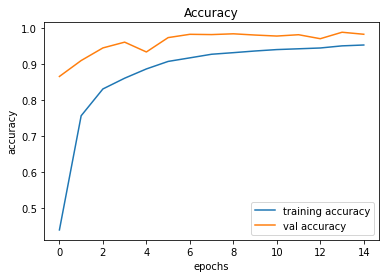

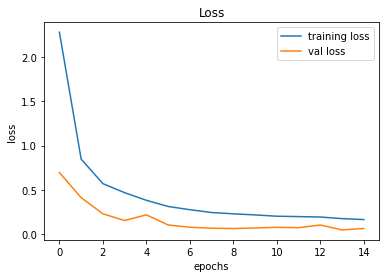

In [14]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="training accuracy")
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()